In [1]:
import os

# Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Visualization
import seaborn as sns
import missingno as msno

import warnings

# seaborn의 font scale을 사용하여 graph의 font size를 지정
plt.style.use('seaborn')
sns.set(font_scale = 2.5)

# ignore warnings
warnings.filterwarnings('ignore')

# 브라우저 내부에 plot을 그릴 수 있도록 설정
%matplotlib inline

<ipython-input-1-6fdcf569fa67>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.model_selection import train_test_split

# LogisticRegression - 데이터가 특정 카테고리에 속해있는지의 여부를 0에서 1의 확률로 예측하는 회귀 알고리즘.
# SVM(Support Vector Machine) - 데이터가 특정 카테고리에 속해있는지 여부를 판단해주는 지도학습 모델로, Classification이나 Logistic Regreesion에 자주 사용됨.
# Random Forest - 다수의 Decision Tree(결정트리)를 학습시키는 ensemble machine learning 모델.
# K-nearest neighbors(KNN) - 어떤 데이터가 주어졌을 때, 주변의 데이터(이웃)들과 한 범주로 묶어주는 모델.

In [3]:
# pandas를 이용하여 데이터를 읽어오기.
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

In [4]:
# head()는 상위 5개의 data를 불러옴
# head(10)과 같이 원하는 data의 개수를 input으로 준다면, 더 많은 데이터를 불러오기 가능.

train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
# columns 함수를 사용하면, train dataset의 열에 해당하는 정보들을 불러올 수 있음

train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# data의 (columns, rows)를 불러오기
print("train : ", train.shape, ", test", test.shape)

train :  (891, 12) , test (418, 11)


In [7]:
# describe() 함수는 data의 columns별 통계량을 가져옴
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# info() 함수는 데이터에 대한 전반적인 정보를 나타냄
# train data에서는 age와 cabin, embarked에 해당하는 정보 중에서 NaN이 있다는 것을 확인할 수 있음.

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# info() 함수를 사용하지 않고, 다른 방식으로도 NaN value를 확인할 수 있다.

for col in test.columns:
    print('{:<15} Percent of NaN value : train - {:.2f}, test - {:.2f} %'.format(col, 100 * (train[col].isnull().sum() / train[col].shape[0]), 100 * (test[col].isnull().sum() / test[col].shape[0])))

PassengerId     Percent of NaN value : train - 0.00, test - 0.00 %
Pclass          Percent of NaN value : train - 0.00, test - 0.00 %
Name            Percent of NaN value : train - 0.00, test - 0.00 %
Sex             Percent of NaN value : train - 0.00, test - 0.00 %
Age             Percent of NaN value : train - 19.87, test - 20.57 %
SibSp           Percent of NaN value : train - 0.00, test - 0.00 %
Parch           Percent of NaN value : train - 0.00, test - 0.00 %
Ticket          Percent of NaN value : train - 0.00, test - 0.00 %
Fare            Percent of NaN value : train - 0.00, test - 0.24 %
Cabin           Percent of NaN value : train - 77.10, test - 78.23 %
Embarked        Percent of NaN value : train - 0.22, test - 0.00 %


<Axes: >

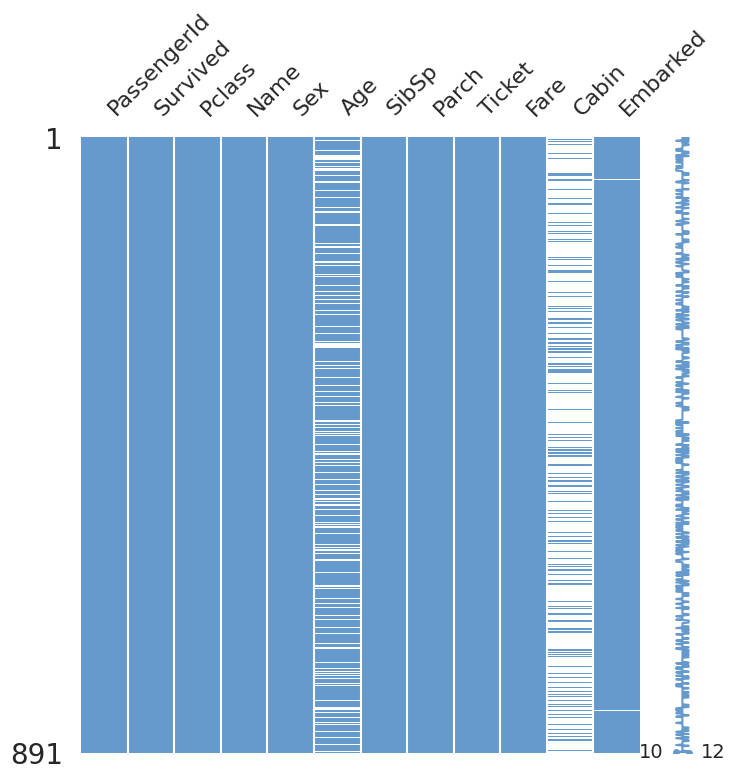

In [10]:
# missingno 라이브러리를 사용하면 null의 분포를 더 쉽게 확인 가능.

msno.matrix(df = train.iloc[:, :], figsize = (8, 8), color = (0.4, 0.6, 0.8))

<Axes: >

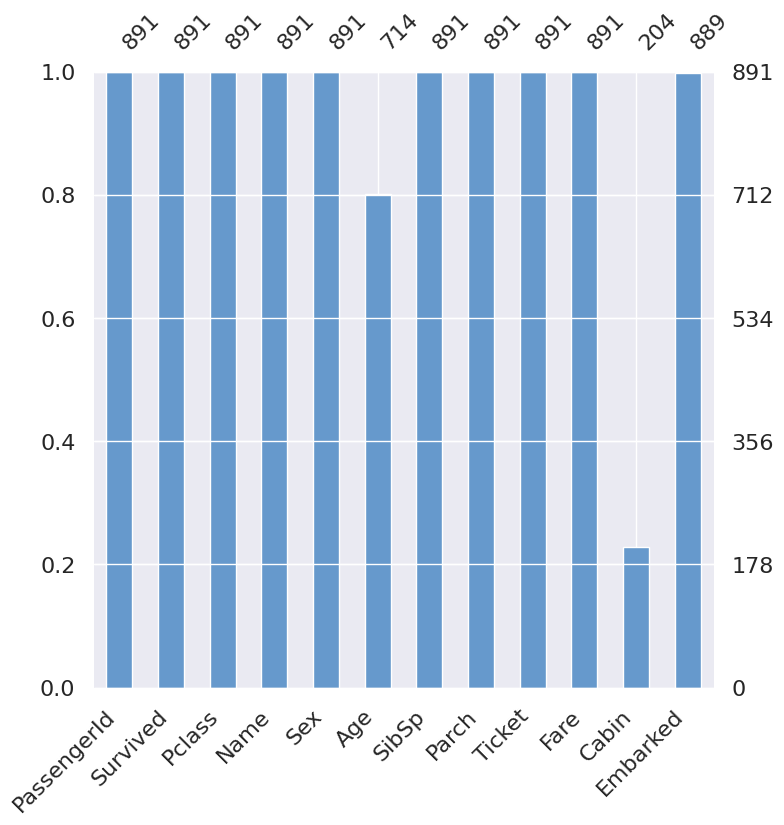

In [11]:
msno.bar(df = train.iloc[:, :], figsize = (8, 8), color = (0.4, 0.6, 0.8))

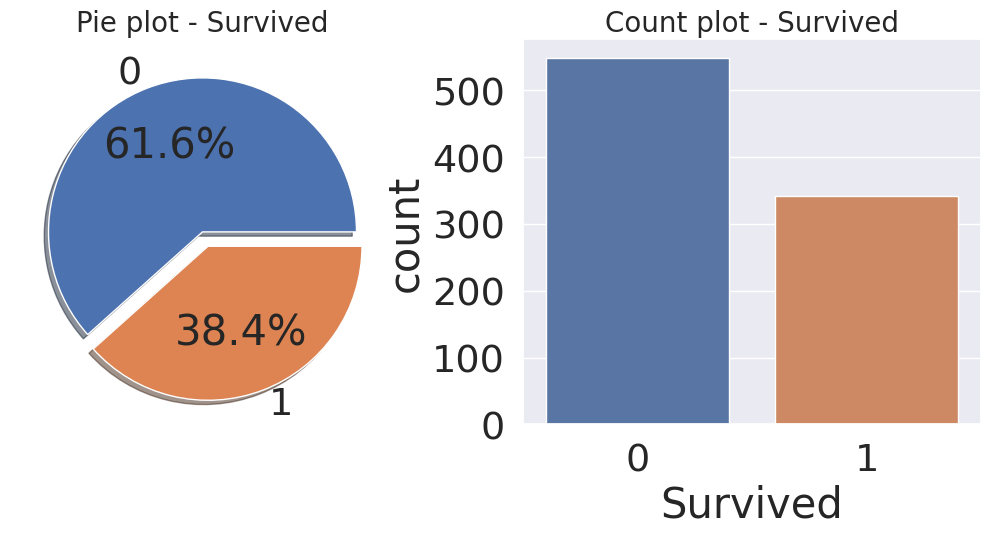

In [12]:
# Count the rate of Survival
# 타이타닉 승객 중 61.6% 인원만 살아남음.

f, ax = plt.subplots(1, 2, figsize = (13, 5))

train['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)

ax[0].set_title('Pie plot - Survived', fontsize = 20)
ax[0].set_ylabel('')

# x 파라미터를 명시적으로 지정해야 함!
sns.countplot(x = 'Survived', data = train, ax = ax[1])
sns.set(font_scale = 0.3)
ax[1].set_title('Count plot - Survived', fontsize = 20)

plt.show()


In [13]:
# Exploratory Data Analysis(EDA)
# Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked의 feature들을 살펴본 후, 쓸모 있는 데이터들을 정제하기

In [14]:
# Pclass
# Pclass(ex: 1, 2, 3 등석)에 따른 생존률을 확인.
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [15]:
pd.crosstab(train['Pclass'], train['Survived'], margins = True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [16]:
# Pclass 별 승객의 수와, 생존자의 수를 나타내면
# 좋은 Pclass에 탑승할 수록 생존할 확률이 높음.

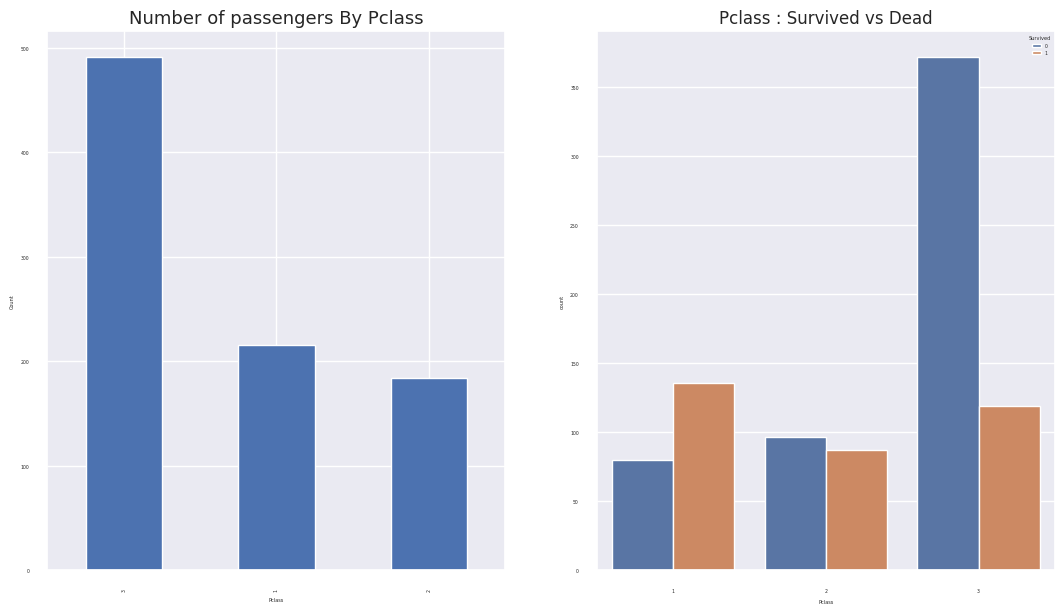

In [17]:
# 성별에 대한 data를 one-hot encoding하기
f, ax = plt.subplots(1, 2, figsize = (13, 7))

train['Pclass'].value_counts().plot.bar(ax = ax[0])
ax[0].set_title("Number of passengers By Pclass", fontsize = 13)
ax[0].set_ylabel("Count")

# using seaborn
# x 파라미터 명시적 지정해야 함.
sns.countplot(x = "Pclass", hue = "Survived", data = train, ax = ax[1])
sns.set(font_scale = 1)
ax[1].set_title("Pclass : Survived vs Dead")
plt.show()

In [18]:
# Pclass에 대한 data를 one-hot encoding 해주기
Pclass_train = pd.get_dummies(train["Pclass"])
Pclass_test = pd.get_dummies(train["Pclass"])

Pclass_train.columns = ["pclass_1", "pclass_2", "pclass_3"]
Pclass_test.columns = ["pclass_1", "pclass_2", "pclass_3"]

train.drop(['Pclass'], axis = 1, inplace = True)
test.drop(['Pclass'], axis = 1, inplace = True)

train = train.join(Pclass_train)
test = test.join(Pclass_train)

In [19]:
train.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,pclass_1,pclass_2,pclass_3
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,False,False
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,False,False
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,False,True


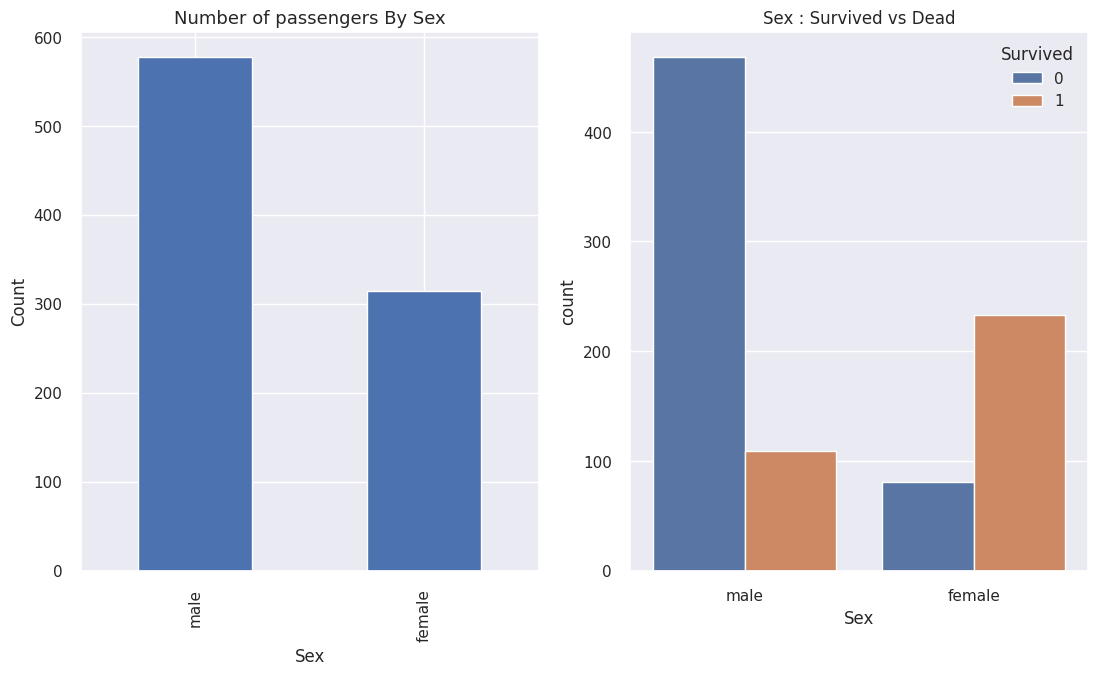

In [20]:
# Sex
# 여성의 생존률이 더 높다

f, ax = plt.subplots(1, 2, figsize = (13, 7))

train["Sex"].value_counts().plot.bar(ax = ax[0])
ax[0].set_title("Number of passengers By Sex", fontsize = 13)
ax[0].set_ylabel("Count")

# using seaborn
sns.countplot(x = "Sex", hue = "Survived", data = train, ax = ax[1])
sns.set(font_scale = 1)
ax[1].set_title("Sex : Survived vs Dead")
plt.show()

In [21]:
# 성별에 대한 data를 one-hot encoding 하기
sex_train = pd.get_dummies(train["Sex"])
sex_test = pd.get_dummies(test["Sex"])

sex_train.columns = ["Female", "Male"]
sex_test.columns = ["Female", "Male"]

train.drop(["Sex"], axis = 1, inplace = True)
test.drop(["Sex"], axis = 1, inplace = True)

train = train.join(sex_train)
test = test.join(sex_test)

In [22]:
train.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,pclass_1,pclass_2,pclass_3,Female,Male
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,True,False,False,True,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,True,True,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,True,False,False,True,False
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,True


In [23]:
# Age
print("The Oldest Passenger : ", train["Age"].max(), " years")
print("The Youngest Passenger : ", train["Age"].min(), "years")
print("Mean of Passenger's Age : {:.2f} years".format(train["Age"].mean()))

The Oldest Passenger :  80.0  years
The Youngest Passenger :  0.42 years
Mean of Passenger's Age : 29.70 years


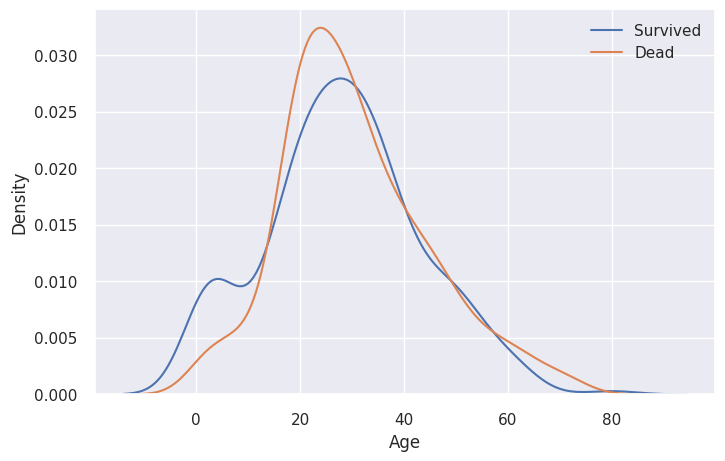

In [27]:
fix, ax = plt.subplots(1, 1, figsize = (8, 5))

sns.kdeplot(train[train["Survived"] == 1]["Age"], ax = ax)
sns.kdeplot(train[train["Survived"] == 0]["Age"], ax = ax)

plt.legend(["Survived", "Dead"])
plt.show()

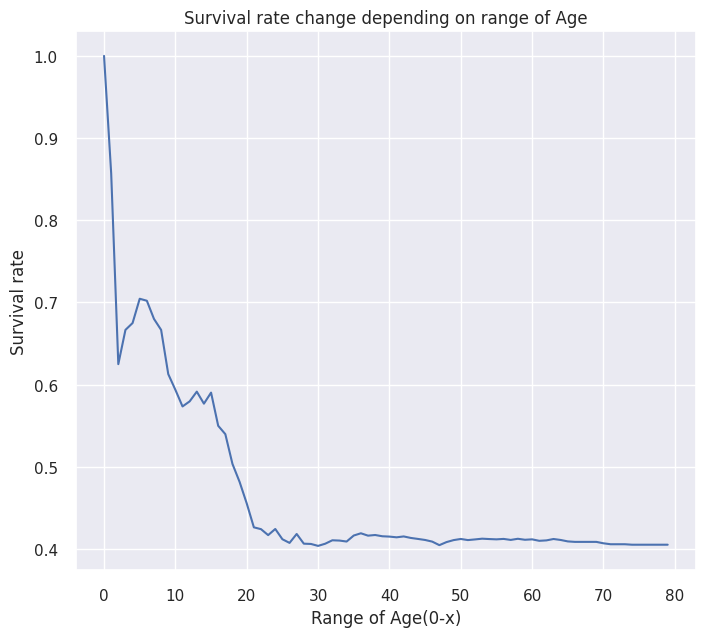

In [32]:
# 나이 범위에 따른 생존률을 확인해보기

survival_rate = []

for i in range(int(train["Age"].min()), int(train["Age"].max())):
    survival_rate.append(train[train["Age"] < i + 1]["Survived"].sum() / train[train["Age"] < i + 1]["Survived"].count())

plt.figure(figsize = (8, 7))
plt.plot(survival_rate)
plt.title("Survival rate change depending on range of Age")
plt.ylabel("Survival rate")
plt.xlabel("Range of Age(0-x)")
plt.show()

In [33]:
# Age 데이터는 20% 정도가 NaN value. 평균값으로 채우기. 중앙값으로 채워도 됨.
print('Percent of NaN value : train - {:.2f} %, test - {:.2f} %'.format(100 * (train["Age"].isnull().sum() / train["Age"].shape[0]), 100 * (test["Age"].isnull().sum() / test["Age"].shape[0])))

Percent of NaN value : train - 19.87 %, test - 20.57 %


In [37]:
train["Age"].fillna(train["Age"].mean(), inplace = True)
test["Age"].fillna(train["Age"].mean(), inplace = True)

In [38]:
# Family
# SibSp(형제, 자매)와 Parch(부모님)은 Family라는 하나의 카테고리로 묶은 후 처리

train["Family"] = train["SibSp"] + train["Parch"] + 1 # 1은 본인
test["Family"] = test["SibSp"] + test["Parch"] + 1 

In [39]:
train[["Name", "Family"]].head()

,Name,Family
0,"Braund, Mr. Owen Harris",2
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2
2,"Heikkinen, Miss. Laina",1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2
4,"Allen, Mr. William Henry",1


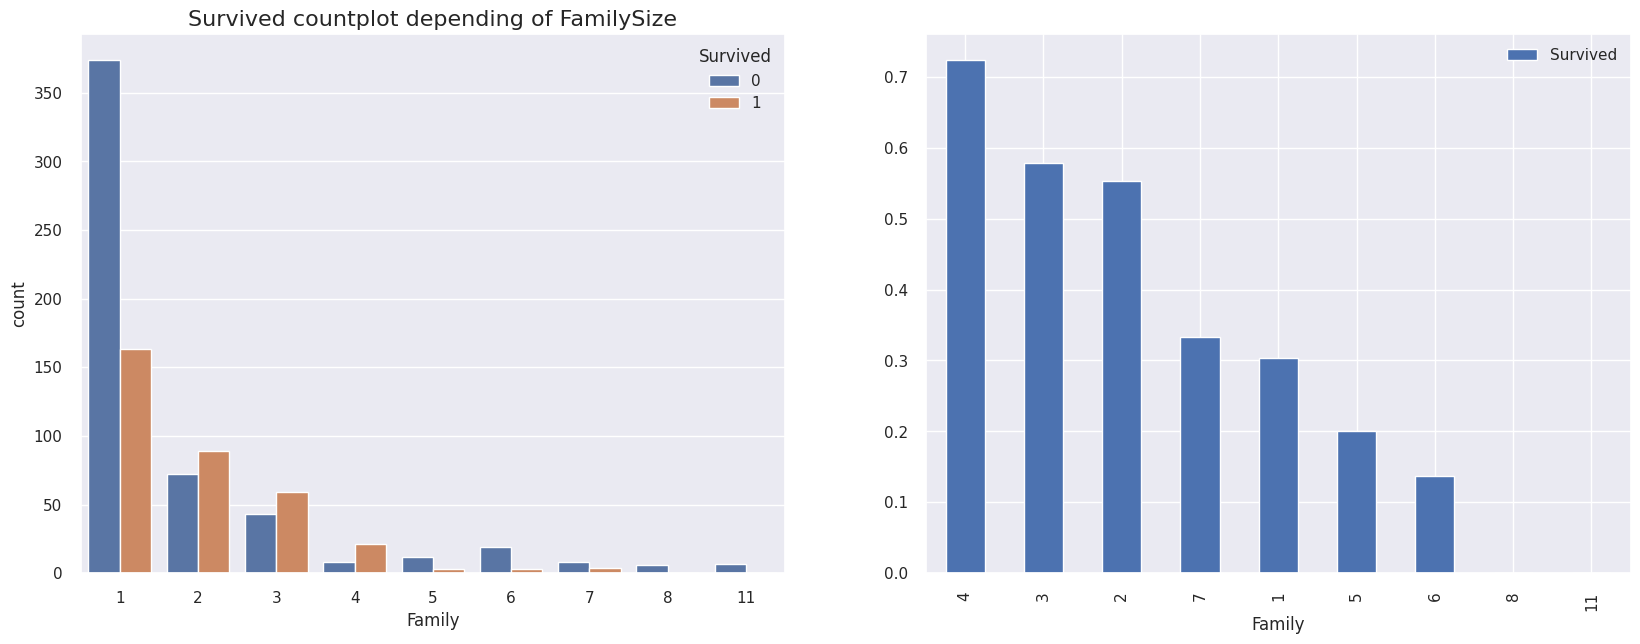

In [41]:
f, ax = plt.subplots(1, 2, figsize = (20, 7))

# x를 명시적으로 지정
sns.countplot(x = "Family", hue = "Survived", data = train, ax = ax[0])
ax[0].set_title("Survived countplot depending of FamilySize", fontsize = 16)

train[["Family", "Survived"]].groupby(["Family"], as_index = True).mean().sort_values(by = "Survived", ascending = False).plot.bar(ax = ax[1])

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

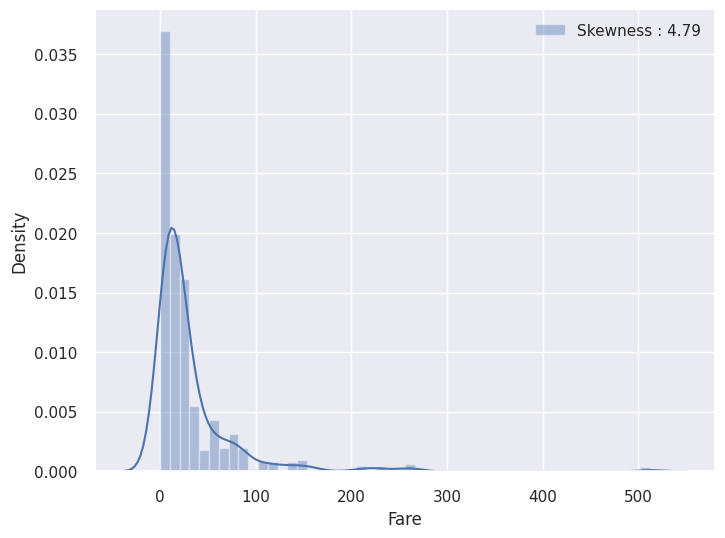

In [42]:
# Fare
# 탑승료에 따른 생존률 확인

f, ax = plt.subplots(1, 1, figsize = (8, 6))

g = sns.distplot(train["Fare"], label = "Skewness : {:.2f}".format(train["Fare"].skew()), ax = ax)
g = g.legend(loc = "best")

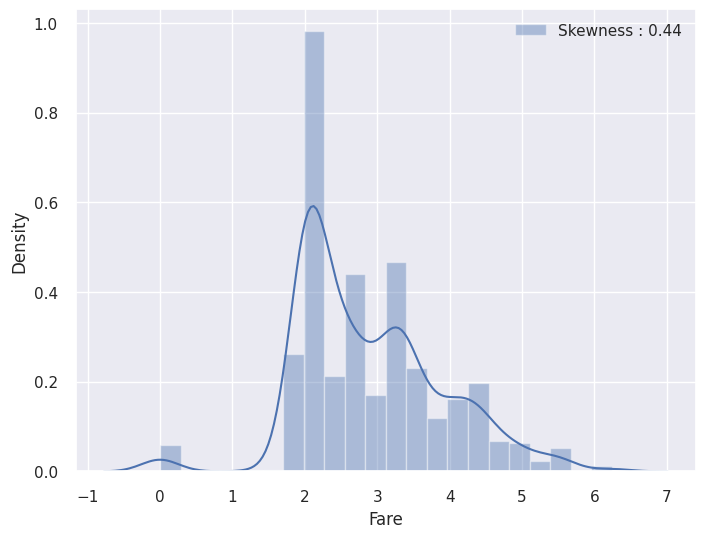

In [43]:
# 위의 Fare 그래프를 보면, 확률 분포가 매우 비대칭적, High Skewness
# 확률 분포가 비대칭적이라면 모델이 잘못 학습될 수 있기에 log 함수를 취해준다.

train["Fare"] = train["Fare"].map(lambda i : np.log(i) if i > 0 else 0)
test["Fare"] = test["Fare"].map(lambda i : np.log(i) if i > 0 else 0)

# 다시 그래프 그리기

f, ax = plt.subplots(1, 1, figsize = (8, 6))
g = sns.distplot(train["Fare"], label = "Skewness : {:.2f}".format(train["Fare"].skew()), ax = ax)
g = g.legend(loc = "best")

In [44]:
# 탑승료에는 test dataset에 하나의 데이터가 비어있음. 빈 부분에는 평균값을 넣어주기

test["Fare"].fillna(test["Fare"].mean(), inplace = True)

In [45]:
# Cabin
# Cabin feature는 null의 비율이 매우 높으므로 이를 통해서 생존률을 예측하기 어려움.
# 따라서 이 데이터는 제거하고 학습을 진행

In [46]:
train = train.drop(["Cabin"], axis = 1)
test = test.drop(["Cabin"], axis = 1)

<Axes: xlabel='Embarked'>

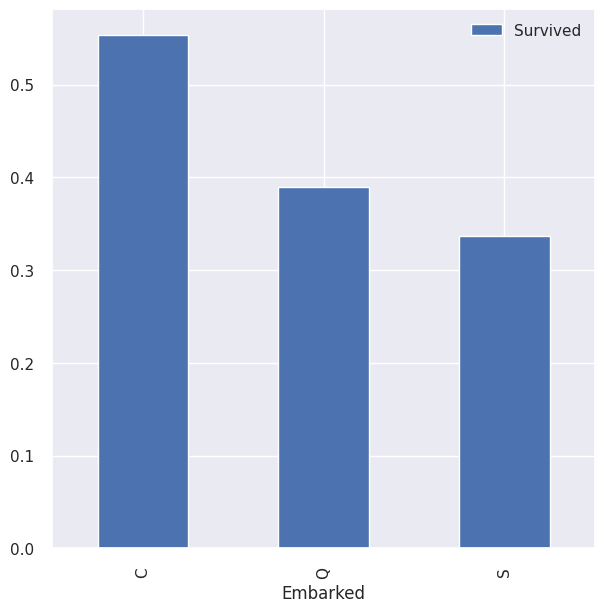

In [47]:
# Embarked
# 탑승구에 따른 생존률을 확인
f, ax = plt.subplots(1, 1, figsize = (7, 7))

train[["Embarked", "Survived"]].groupby(["Embarked"], as_index = True).mean().sort_values(by = "Survived", ascending = False).plot.bar(ax = ax)

In [48]:
# Embarked에는 2개의 Null value가 있었음.
# S 탑승구에는 가장 많은 승객이 있으므로, null value의 Embarked는 S로 채운다.

train["Embarked"].fillna("S", inplace = True)
test["Embarked"].fillna("S", inplace = True)

In [52]:
# one-hot encoding
embarked_train = pd.get_dummies(train["Embarked"])
embarked_test = pd.get_dummies(test["Embarked"])

embarked_train.columns = ["embarked_s", "embarked_c", "embarked_q"]
embarked_test.columns = ["embarked_s", "embarked_c", "embarked_q"]

train.drop(["Embarked"], axis = 1, inplace = True)
test.drop(["Embarked"], axis = 1, inplace = True)

train = train.join(embarked_train)
test = test.join(embarked_test)

KeyError: 'Embarked'

In [54]:
train.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,pclass_1,pclass_2,pclass_3,Female,Male,Family,embarked_s,embarked_c,embarked_q
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,1.981001,False,False,True,False,True,2,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,4.266662,True,False,False,True,False,2,True,False,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,2.070022,False,False,True,True,False,1,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,3.972177,True,False,False,True,False,2,False,False,True
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,2.085672,False,False,True,False,True,1,False,False,True


In [56]:
train.drop(["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Male"], axis = 1, inplace = True)
test.drop(["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Male"], axis = 1, inplace = True)

KeyError: "['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Male'] not found in axis"

In [57]:
train.head()

,Survived,Age,Fare,pclass_1,pclass_2,pclass_3,Female,Family,embarked_s,embarked_c,embarked_q
0,0,22.0,1.981001,False,False,True,False,2,False,False,True
1,1,38.0,4.266662,True,False,False,True,2,True,False,False
2,1,26.0,2.070022,False,False,True,True,1,False,False,True
3,1,35.0,3.972177,True,False,False,True,2,False,False,True
4,0,35.0,2.085672,False,False,True,False,1,False,False,True


In [58]:
# Building Machine Learning Model & Prediction using the Trained Model
# Titanic problem은 생존률을 0이나 1로 예측하면 binary classification 문제.
# 따라서 training dataset의 여러 feature들을 이용하여 survived 여부를 파악하도록 하자

In [59]:
# Preparation - Split dataset into train, vaild, test set

# train data에서 target에 해당되는 생존률을 train_target 변수에 미리 저장
train_target = train["Survived"].values
train_data = train.drop("Survived", axis = 1).values

In [60]:
# DataFrame 형식으로 되어 있는 test를 list로 변환
test_value = test.values
print(test_value)

[[892 'Kelly, Mr. James' 34.5 ... False True 1]
 [893 'Wilkes, Mrs. James (Ellen Needs)' 47.0 ... True False 2]
 [894 'Myles, Mr. Thomas Francis' 62.0 ... False True 1]
 ...
 [1307 'Saether, Mr. Simon Sivertsen' 38.5 ... False True 1]
 [1308 'Ware, Mr. Frederick' 29.69911764705882 ... False True 1]
 [1309 'Peter, Master. Michael J' 29.69911764705882 ... False True 3]]


In [61]:
data_train, data_valid, target_train, target_valid = train_test_split(train_data, train_target, test_size = 0.3, random_state = 2025)

In [62]:
# Model generation and prediction
# Logistic Regression

logistic_regression = LogisticRegression()
logistic_regression.fit(data_train, target_train)
prediction = logistic_regression.predict(data_valid)


In [66]:
print("총 {}명 중 {:.2f}%의 정확도로 생존을 맞춤".format(target_valid.shape[0], 100 * metrics.accuracy_score(prediction, target_valid)))

총 268명 중 77.24%의 정확도로 생존을 맞춤


In [67]:
# Support Vector Machine
svc = SVC()
svc.fit(data_train, target_train)
prediction = svc.predict(data_valid)

In [68]:
print("총 {}명 중 {:.2f}%의 정확도로 생존을 맞춤".format(target_valid.shape[0], 100 * metrics.accuracy_score(prediction, target_valid)))

총 268명 중 61.19의 정확도로 생존을 맞춤


In [70]:
# K-nearest Neighborhood
knn = KNeighborsClassifier()
knn.fit(data_train, target_train)
prediction = knn.predict(data_valid)

In [71]:
print("총 {}명 중 {:.2f}%의 정확도로 생존을 맞춤".format(target_valid.shape[0], 100 * metrics.accuracy_score(prediction, target_valid)))

총 268명 중 68.28%의 정확도로 생존을 맞춤


In [72]:
# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(data_train, target_train)
prediction = random_forest.predict(data_valid)

In [73]:
print("총 {}명 중 {:.2f}%의 정확도로 생존을 맞춤".format(target_valid.shape[0], 100 * metrics.accuracy_score(prediction, target_valid)))

총 268명 중 76.49%의 정확도로 생존을 맞춤


In [74]:
# Feature Importance
# 어떤 feature가 model에 영향을 많이 줬는지 확인하기
# random_forest model에서는 Age feature가 model에 가장 큰 영향을 줌을 확인.

from pandas import Series

feature_importance = random_forest.feature_importances_
series_feature_importance = Series(feature_importance, index = test.columns)

plt.figure(figsize = (7, 7))
series_feature_importance.sort_values(ascending = True).plot.barh()
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

ValueError: Length of values (10) does not match length of index (13)

In [75]:
# Prediction on Test set
# logistic regression 
submission = pd.read_csv("../input/titanic/gender_submission.csv")
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [76]:
prediction = logistic_regression.predict(test_value)
submission['Survived'] = prediction
submission.to_csv('./my_first_submission.csv', index = False)

ValueError: could not convert string to float: 'Kelly, Mr. James'